# Import Data and Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.concat([
  pd.read_csv("/kaggle/input/60k-stack-overflow-questions-with-quality-rate/train.csv"), 
  pd.read_csv("/kaggle/input/60k-stack-overflow-questions-with-quality-rate/valid.csv")
])

data.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


In [3]:
data['Text'] = data['Title'] + " " + data['Body']
data['Text'] = data['Text'].str.replace('>',',')
data['Text'] = data['Text'].str.replace('<','')
# df = df.drop(columns=['Title', 'Body'])
data.head()

,Id,Title,Body,Tags,CreationDate,Y,Text
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,"Java: Repeat Task Every Random Seconds p,I'm a..."
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ,"Why are Java Optionals immutable? p,I'd like t..."
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,Text Overlay Image with Darkened Opacity React...
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,"Why ternary operator in swift is so picky? p,T..."
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ,"hide/show fab with scale animation p,I'm using..."


# EDA

In [4]:
data['Y'].value_counts()

Y
LQ_CLOSE    20000
HQ          20000
LQ_EDIT     20000
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

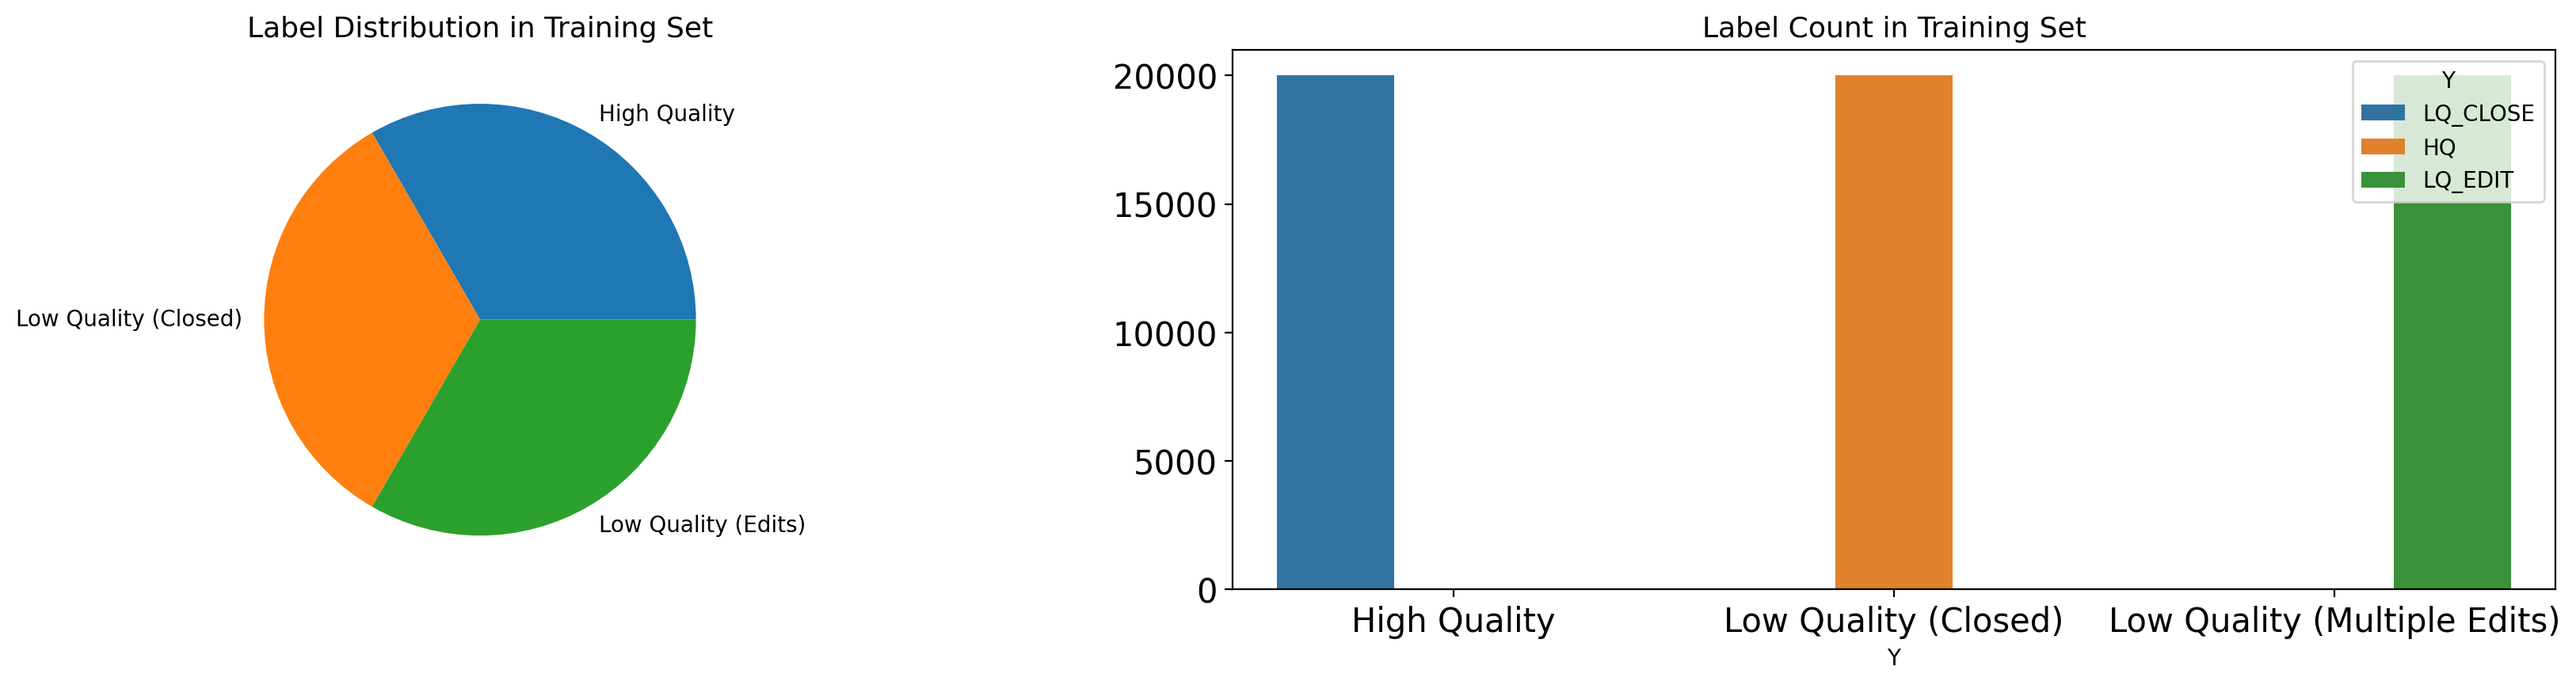

In [5]:
fig, axes = plt.subplots(ncols = 2, figsize = (18, 4), dpi = 200)
plt.tight_layout()

data.groupby('Y').count()['Id'].plot(kind = 'pie', ax = axes[0], labels = ['High Quality', 'Low Quality (Closed)', 'Low Quality (Edits)'])
sns.countplot(x = data['Y'], hue = data['Y'], ax = axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['High Quality', 'Low Quality (Closed)', 'Low Quality (Multiple Edits)'])
axes[0].tick_params(axis = 'x', labelsize = 15)
axes[0].tick_params(axis = 'y', labelsize = 15)
axes[1].tick_params(axis = 'x', labelsize = 15)
axes[1].tick_params(axis = 'y', labelsize = 15)

axes[0].set_title('Label Distribution in Training Set', fontsize = 13)
axes[1].set_title('Label Count in Training Set', fontsize = 13)

plt.show()

In [6]:
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

Note: you may need to restart the kernel to use updated packages.


In [7]:
comment_words = ''
stopwords = set(STOPWORDS)

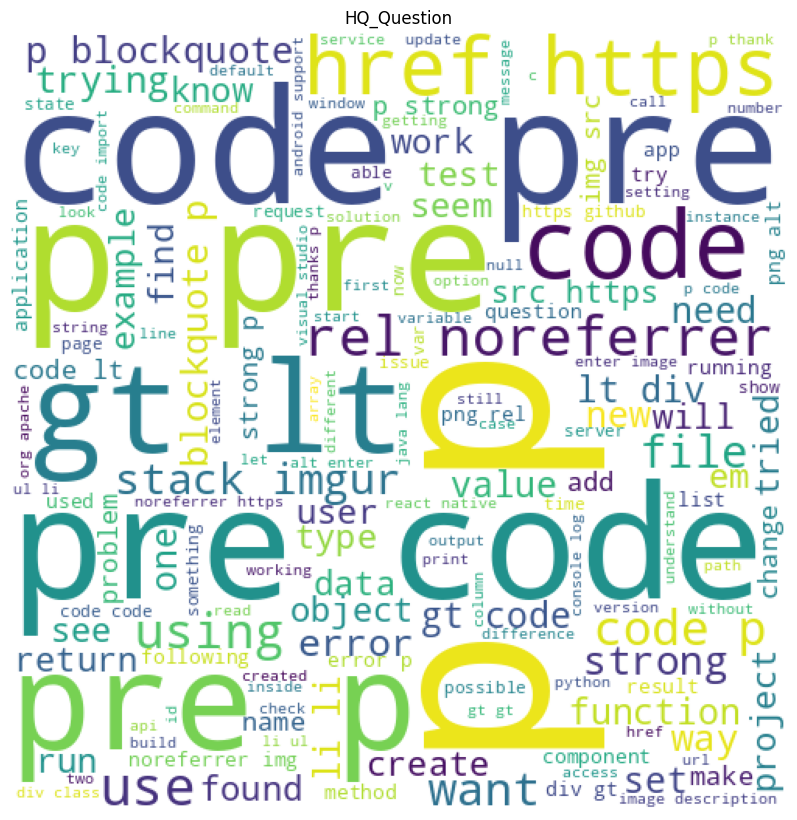

In [8]:
HQ_Question = data[data['Y'] == 'HQ']

for val in HQ_Question['Text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.title("HQ_Question")
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

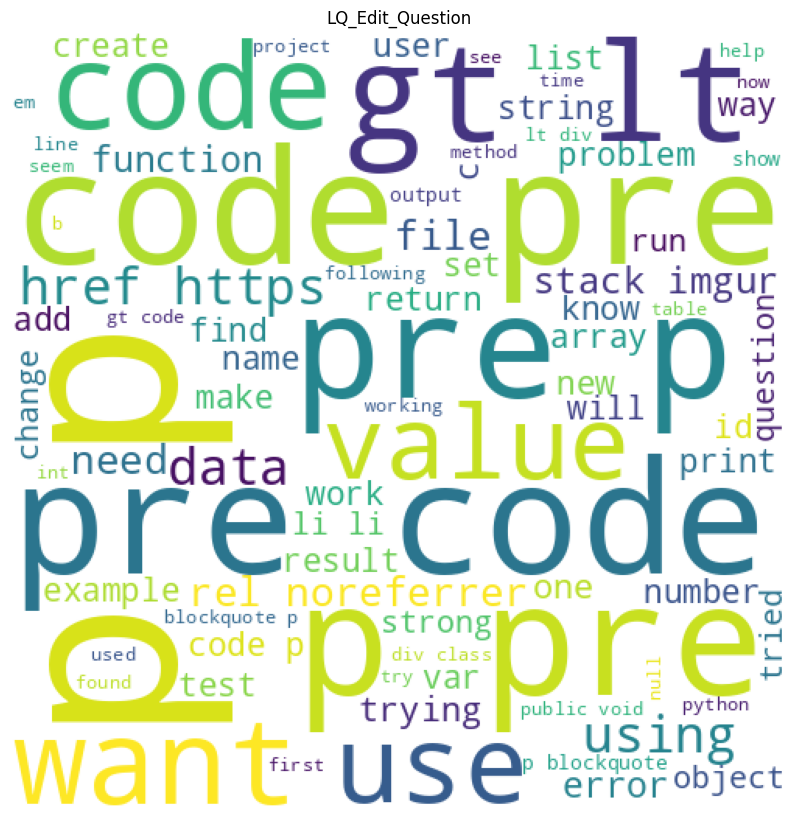

In [9]:
LQ_Edit = data[data['Y'] == 'LQ_EDIT']

for val in LQ_Edit['Text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                  
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.title("LQ_Edit_Question")
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

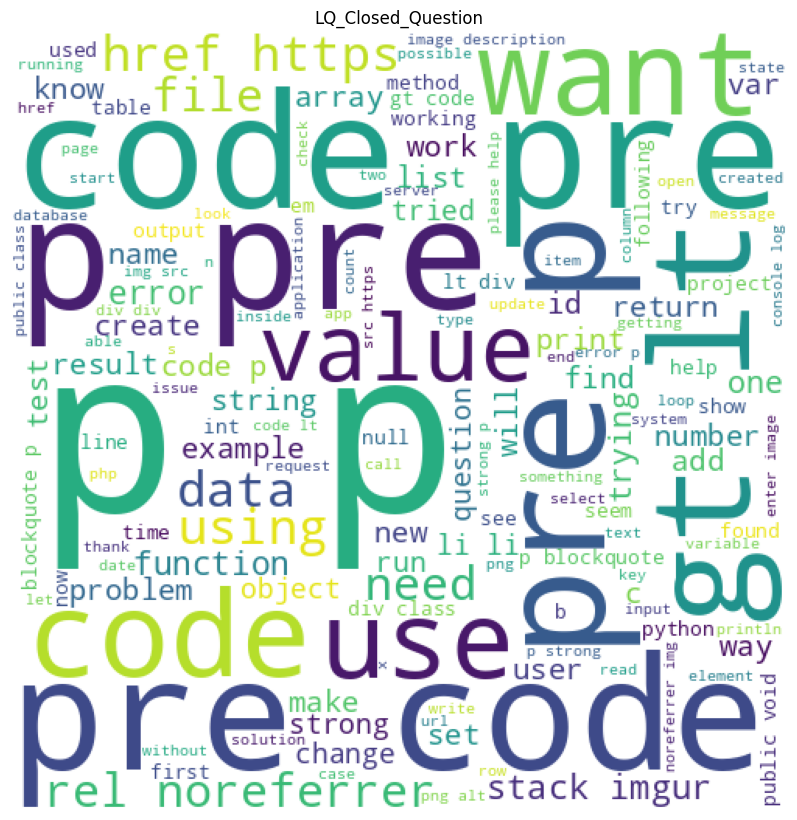

In [10]:
LQ_Close = data[data['Y'] == 'LQ_CLOSED']

for val in LQ_Close['Text']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                   
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.title("LQ_Closed_Question")
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

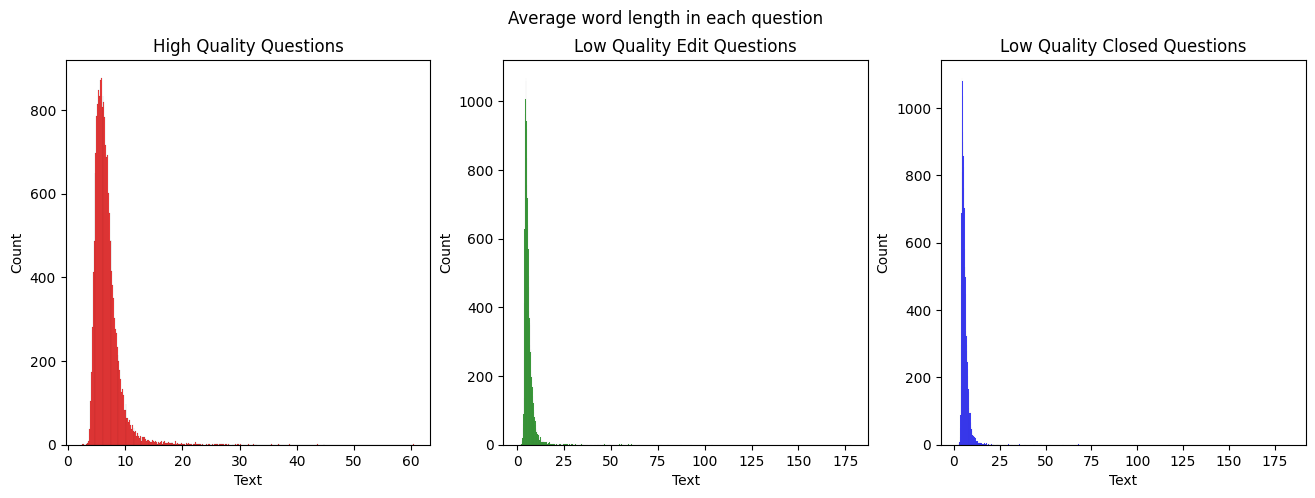

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

# High-Quality Questions
word = data[data['Y'] == 'HQ']['Text'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)), ax=ax1, color='red')
ax1.set_title('High Quality Questions')

# Low-Quality Edit Questions
word = data[data['Y'] == 'LQ_EDIT']['Text'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)), ax=ax2, color='green')
ax2.set_title('Low Quality Edit Questions')

# Low Quality Closed Question
word = data[data['Y'] == 'LQ_CLOSE']['Text'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)), ax=ax3, color='blue')
ax3.set_title('Low Quality Closed Questions')

fig.suptitle('Average word length in each question')
plt.show()

# Preprocessing

In [12]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
targets = {'HQ': 0, 'LQ_EDIT': 1, 'LQ_CLOSE': 2}
data['Y'] = data['Y'].map(targets)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data["Text"], data["Y"], test_size=0.3, random_state=42, stratify=data["Y"])

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [15]:
y_train.value_counts()

Y
2    14000
0    14000
1    14000
Name: count, dtype: int64

In [16]:
y_test.value_counts()

Y
1    6000
0    6000
2    6000
Name: count, dtype: int64

In [17]:
%pip install -U "tensorflow-text==2.13.*"
%pip install "tf-models-official==2.13.*"

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for tf-models-official==2.13.* from https://files.pythonhosted.org/packages/d8/c3/4511e49412492966f4e6e0a20b41ae66d027e5a76e8c2b436b591ecc4273/tf_models_official-2.13.2-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.1 MB/s eta 0:00:00
  Obtaining dependency information for immutabledict from https://files.pythonhosted.org/packages/77/d8/69b89c358609ef1853d860bcf59472abe65e2c434767e6e91c57e12e5c23/immutabledict-4.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for pycocotools from https://files.pythonhosted.org/packages/ba/64/0451cf41a00fd5ac4501de4ea0e395b7d909e09d665e56890b5d3809ae26/pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for sacrebleu from https://files.pythonhosted.org/packages/df/c0/ff53cb76c1b050ad25d056877ba6d3f6fa964134370c4ccf57ad933d6f72

In [18]:
import tensorflow as tf
import transformers
from transformers import BertTokenizer, TFBertModel

In [19]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained("bert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

# Training

In [20]:
def regular_encode(texts, tokenizer, maxlen = 512):
    enc_di = tokenizer.batch_encode_plus(
        texts,
        truncation=True,
        padding='max_length',
        max_length=maxlen,
        return_attention_mask=True,
        return_token_type_ids=False
    )
    return np.array(enc_di['input_ids'])

In [21]:
Xtrain_encoded = regular_encode(X_train.astype('str'), tokenizer, maxlen = 128)
Xtest_encoded = regular_encode(X_test.astype('str'), tokenizer, maxlen = 128)
ytrain_encoded = tf.keras.utils.to_categorical(y_train, num_classes = 3, dtype = 'int32')
ytest_encoded = tf.keras.utils.to_categorical(y_test, num_classes = 3, dtype = 'int32')

In [22]:
def build_model(transformer, loss = 'categorical_crossentropy', max_len = 512):
    input_word_ids = tf.keras.layers.Input(shape = (max_len,), dtype = tf.int32, name = "input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    #adding dropout layer
    x = tf.keras.layers.Dropout(0.40)(cls_token)

    #using a dense layer of 3 neurons as the number of unique categories is 3. 
    out = tf.keras.layers.Dense(3, activation = 'softmax')(x)

    model = tf.keras.Model(inputs = input_word_ids, outputs = out)
    model.compile(tf.keras.optimizers.Adam(learning_rate = 3e-5), loss = loss, metrics = ['accuracy'])
    return model

In [23]:
transformer_layer = transformers.TFAutoModel.from_pretrained('bert-base-uncased')
model = build_model(transformer_layer, max_len = 128)
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 tf_bert_model_1 (TFBertMod  TFBaseModelOutputWithPo   109482240 
 el)                         olingAndCrossAttentions             
                             (last_hidden_state=(Non             
                             e, 128, 768),                       
                              pooler_output=(None, 7             
                             68),                                
                              past_key_values=None,              
                             hidden_states=None, att             
                             entions=None, cross_att             
                             entions=None)                   

In [24]:
BATCH_SIZE = 32
AUTO = tf.data.experimental.AUTOTUNE 
train_dataset = (tf.data.Dataset.from_tensor_slices((Xtrain_encoded, ytrain_encoded)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))
test_dataset = (tf.data.Dataset.from_tensor_slices(Xtest_encoded).batch(BATCH_SIZE))

In [25]:
n_steps = Xtrain_encoded.shape[0] // BATCH_SIZE
train_history = model.fit(train_dataset, steps_per_epoch = n_steps, epochs = 10)

Epoch 1/10
1312/1312 [==============================] - 656s 466ms/step - loss: 0.2579 - accuracy: 0.8902
Epoch 2/10
1312/1312 [==============================] - 607s 462ms/step - loss: 0.1542 - accuracy: 0.9400
Epoch 3/10
1312/1312 [==============================] - 606s 462ms/step - loss: 0.0986 - accuracy: 0.9638
Epoch 4/10
1312/1312 [==============================] - 606s 462ms/step - loss: 0.0574 - accuracy: 0.9801
Epoch 5/10
1312/1312 [==============================] - 605s 461ms/step - loss: 0.0356 - accuracy: 0.9877
Epoch 6/10
1312/1312 [==============================] - 605s 461ms/step - loss: 0.0276 - accuracy: 0.9908
Epoch 7/10
1312/1312 [==============================] - 605s 461ms/step - loss: 0.0185 - accuracy: 0.9937
Epoch 8/10
1312/1312 [==============================] - 605s 461ms/step - loss: 0.0175 - accuracy: 0.9943
Epoch 9/10
1312/1312 [==============================] - 605s 461ms/step - loss: 0.0167 - accuracy: 0.9943
Epoch 10/10
1312/1312 [=======================

In [26]:
preds = model.predict(test_dataset, verbose = 1)

#converting the one hot vector output to a linear numpy array.
pred_classes = np.argmax(preds, axis = 1)

563/563 [==============================] - 93s 161ms/step


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
accuracy = accuracy_score(y_test, pred_classes)

precision = precision_score(y_test, pred_classes, average='weighted')

recall = recall_score(y_test, pred_classes, average='weighted')

f1 = f1_score(y_test, pred_classes, average='weighted')

# Print the metrics
print('Accuracy : {:.2f}%'.format(100 * accuracy))
print('Precision: {:.2f}%'.format(100 * precision))
print('Recall: {:.2f}%'.format(100 * recall))
print('F1 Score: {:.2f}%'.format(100 * f1))

Accuracy : 91.58%
Precision: 91.79%
Recall: 91.58%
F1 Score: 91.57%


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

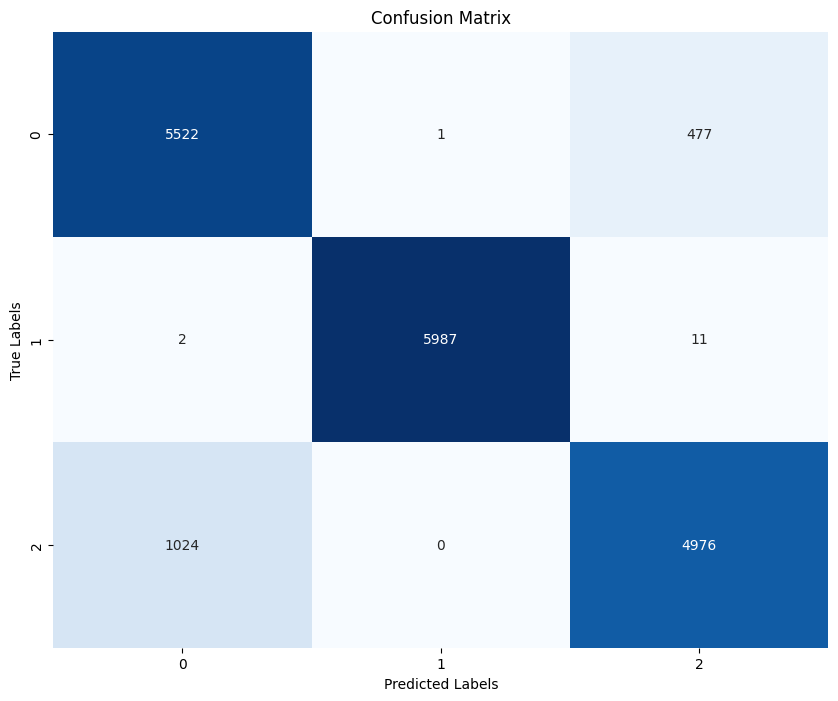

In [30]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save('StackOverflowQuestionClassification')